In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=712560f70ae512a58fd4427af48ddb36


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=712560f70ae512a58fd4427af48ddb36&q=Boston


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 12 | haines junction
Processing Record 3 of Set 12 | rikitea
Processing Record 4 of Set 12 | albany
Processing Record 5 of Set 12 | channel-port aux basques
Processing Record 6 of Set 12 | atuona
Processing Record 7 of Set 12 | mataura
Processing Record 8 of Set 12 | kahului
Processing Record 9 of Set 12 | srednekolymsk
Processing Record 10 of Set 12 | tuktoyaktuk
Processing Record 11 of Set 12 | nanortalik
Processing Record 12 of Set 12 | buala
Processing Record 13 of Set 12 | wasilla
Processing Record 14 of Set 12 | bluff
Processing Record 15 of Set 12 | katsuura
Processing Record 16 of Set 12 | bizhbulyak
Processing Record 17 of Set 12 | arraial do cabo
Processing Record 18 of Set 12 | lorengau
Processing Record 19 of Set 12 | carnarvon
Processing Record 20 of Set 12 | port alfred
Processing Record 21 of Set 12 | tricase
Processing Record 22 of Set 12 | payo
Processing Record 23 of Set 1

Processing Record 33 of Set 15 | saint-augustin
Processing Record 34 of Set 15 | souillac
Processing Record 35 of Set 15 | nishihara
Processing Record 36 of Set 15 | floro
Processing Record 37 of Set 15 | dongsheng
Processing Record 38 of Set 15 | porto velho
Processing Record 39 of Set 15 | victoria
Processing Record 40 of Set 15 | airai
Processing Record 41 of Set 15 | flinders
Processing Record 42 of Set 15 | grindavik
Processing Record 43 of Set 15 | san jeronimo
Processing Record 44 of Set 15 | griffith
Processing Record 45 of Set 15 | sao felix do xingu
Processing Record 46 of Set 15 | bengkulu
Processing Record 47 of Set 15 | port-gentil
Processing Record 48 of Set 15 | solvychegodsk
Processing Record 49 of Set 15 | senno
Processing Record 50 of Set 15 | skibbereen
Processing Record 1 of Set 16 | pemangkat
Processing Record 2 of Set 16 | vilkaviskis
Processing Record 3 of Set 16 | goderich
Processing Record 4 of Set 16 | amderma
City not found. Skipping...
Processing Record 5 of

Processing Record 18 of Set 19 | hofn
Processing Record 19 of Set 19 | south venice
Processing Record 20 of Set 19 | kiama
Processing Record 21 of Set 19 | kudahuvadhoo
Processing Record 22 of Set 19 | biarritz
Processing Record 23 of Set 19 | raudeberg
Processing Record 24 of Set 19 | usinsk
Processing Record 25 of Set 19 | coos bay
Processing Record 26 of Set 19 | arman
Processing Record 27 of Set 19 | minsk
Processing Record 28 of Set 19 | la primavera
Processing Record 29 of Set 19 | auch
Processing Record 30 of Set 19 | turukhansk
Processing Record 31 of Set 19 | fayaoue
Processing Record 32 of Set 19 | hudson bay
Processing Record 33 of Set 19 | majene
Processing Record 34 of Set 19 | roma
Processing Record 35 of Set 19 | nouadhibou
Processing Record 36 of Set 19 | thinadhoo
Processing Record 37 of Set 19 | zwijndrecht
Processing Record 38 of Set 19 | pizarro
Processing Record 39 of Set 19 | shimoda
Processing Record 40 of Set 19 | husavik
Processing Record 41 of Set 19 | banjar


Processing Record 4 of Set 23 | kuybysheve
Processing Record 5 of Set 23 | turlock
Processing Record 6 of Set 23 | utiroa
City not found. Skipping...
Processing Record 7 of Set 23 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 23 | aykhal
Processing Record 9 of Set 23 | fairbanks
Processing Record 10 of Set 23 | anadyr
Processing Record 11 of Set 23 | bilibino
Processing Record 12 of Set 23 | moche
Processing Record 13 of Set 23 | tarauaca
Processing Record 14 of Set 23 | okhotsk
Processing Record 15 of Set 23 | bubaque
Processing Record 16 of Set 23 | slave lake
Processing Record 17 of Set 23 | lincoln
Processing Record 18 of Set 23 | nybro
Processing Record 19 of Set 23 | arlit
Processing Record 20 of Set 23 | puerto baquerizo moreno
Processing Record 21 of Set 23 | martapura
Processing Record 22 of Set 23 | rio gallegos
Processing Record 23 of Set 23 | sale
Processing Record 24 of Set 23 | pentapolis
City not found. Skipping...
Processing Record 25 of Set 23 |

In [19]:
len(city_data)

543

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Haines Junction,60.7522,-137.5108,-34.60,67,99,1.14,CA,2021-01-28 10:58:11
1,Rikitea,-23.1203,-134.9692,79.34,71,65,5.39,PF,2021-01-28 10:58:11
2,Albany,42.6001,-73.9662,25.00,73,90,10.36,US,2021-01-28 10:58:11
3,Channel-Port Aux Basques,47.5702,-59.1367,24.10,93,77,12.46,CA,2021-01-28 10:58:12
4,Atuona,-9.8000,-139.0333,77.79,80,1,13.65,PF,2021-01-28 10:58:12
5,Mataura,-46.1927,168.8643,48.99,78,72,10.00,NZ,2021-01-28 10:58:12
6,Kahului,20.8947,-156.4700,71.60,68,1,17.27,US,2021-01-28 10:58:12
7,Srednekolymsk,67.4500,153.6833,-21.35,87,100,8.81,RU,2021-01-28 10:58:12
8,Tuktoyaktuk,69.4541,-133.0374,-27.35,85,3,7.27,CA,2021-01-28 10:58:12
9,Nanortalik,60.1432,-45.2371,25.56,90,93,5.03,GL,2021-01-28 10:58:13


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Haines Junction,CA,2021-01-28 10:58:11,60.7522,-137.5108,-34.60,67,99,1.14
1,Rikitea,PF,2021-01-28 10:58:11,-23.1203,-134.9692,79.34,71,65,5.39
2,Albany,US,2021-01-28 10:58:11,42.6001,-73.9662,25.00,73,90,10.36
3,Channel-Port Aux Basques,CA,2021-01-28 10:58:12,47.5702,-59.1367,24.10,93,77,12.46
4,Atuona,PF,2021-01-28 10:58:12,-9.8000,-139.0333,77.79,80,1,13.65
...,...,...,...,...,...,...,...,...,...
538,Navrongo,GH,2021-01-28 11:00:03,10.8956,-1.0921,93.51,9,58,12.41
539,Champerico,GT,2021-01-28 11:00:05,14.3000,-91.9167,63.00,95,6,6.40
540,Sibolga,ID,2021-01-28 11:00:08,1.7427,98.7792,81.16,75,94,2.51
541,Cervo,ES,2021-01-28 11:00:09,43.6702,-7.4101,61.00,80,100,5.01


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


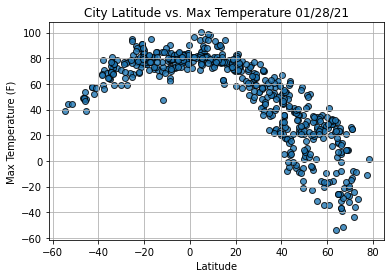

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
           max_temps,
           edgecolor='black', linewidths=1, marker="o",
           alpha=0.8, label='Cities')

# Incorporate the outer graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

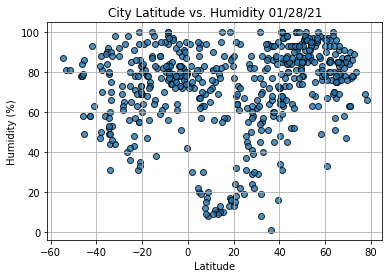

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

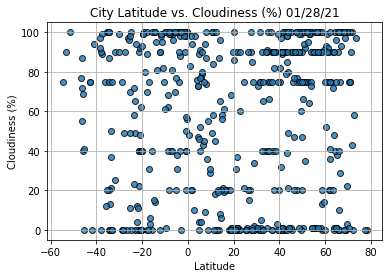

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

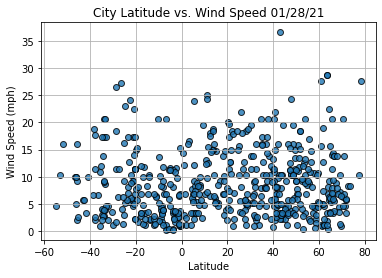

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()